In [2]:
import matplotlib.pyplot as plt

# Staph Time 

In [3]:
B_c=0.45
B_h=0.40
s_c= 1/7
s_h= 1/5
a_c= 0.1
a_h= 0.1
N= 400
var('H,C')

dHdt= (B_h/N)*(N-C-H)*H - (s_h+a_h)*H
dCdt=(B_c/N)*(N-C-H)*C - (s_c+a_c)*C


#calculated EQ points by hand(see report for details)
#points listed as (H,C)
eq1 = (0,0)
eq2 = (0, N - (N/B_c)*(s_c+a_c))
eq3 = (N-0-(s_h+a_h)*(N/B_h), 0)


eq_points_hand = [eq1,eq2,eq3]

In [4]:
for e in eq_points_hand:
    print(e)

(0, 0)
(0, 184.126984126984)
(99.9999999999999, 0)


In [5]:
#instead, let's have sage caclulate the EQ points and see if there is a difference: 

equation1 = dHdt==0
equation2 = dCdt==0

equilibria = solve( [equation1,equation2],H,C)
for e in equilibria: 
    print(e)

[H == 0, C == 0]
[H == 100, C == 0]
[H == 0, C == (11600/63)]


In [6]:
eq_points_computer=[(0,0),(100,0),(0,11600/63)]

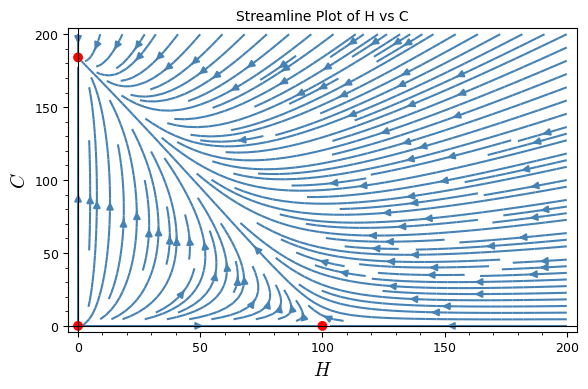

In [7]:
#graph of the whole system (zoomed out)
p = streamline_plot([dHdt,dCdt], (H,0,200) , (C,0,200),
                       axes_labels=['$H$','$C$'], density=1.5, title='Streamline Plot of H vs C',
                       color='steelblue',zorder=1)
p+=points(eq_points_computer, color='red', pointsize=50, zorder=2)
p.fontsize(9)
show(p)

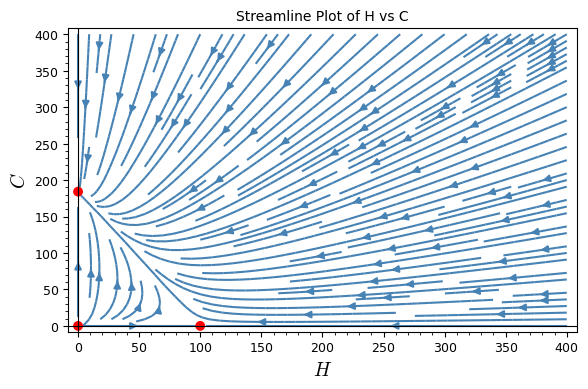

In [9]:
#graph of the whole system (zoomed out further)
p = streamline_plot([dHdt,dCdt], (H,0,400) , (C,0,400),
                       axes_labels=['$H$','$C$'], density=1.5, title='Streamline Plot of H vs C',
                       color='steelblue',zorder=1)
p+=points(eq_points_computer, color='red', pointsize=50, zorder=2)
p.fontsize(9)
show(p)

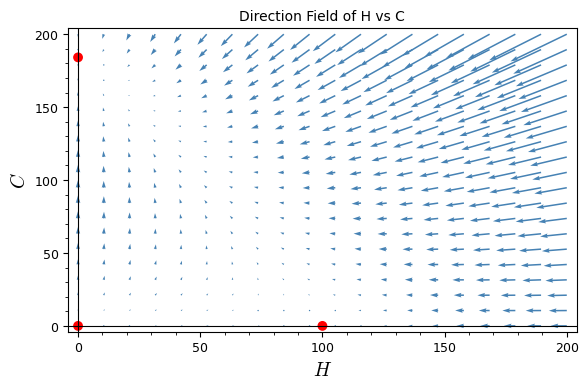

In [18]:
#graph of the whole system (zoomed out)
p = plot_vector_field([dHdt,dCdt], (H,0,200) , (C,0,200),
                       axes_labels=['$H$','$C$'], title='Direction Field of H vs C',
                       color='steelblue',zorder=1)
p+=points(eq_points_computer, color='red', pointsize=50, zorder=2)
p.fontsize(9)
show(p)

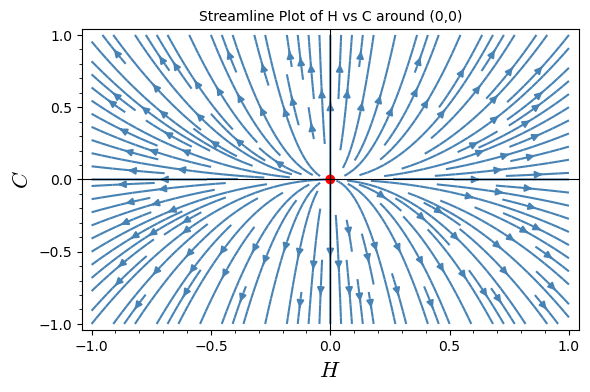

In [7]:
#zoom in near eq1
p = streamline_plot([dHdt,dCdt], (H,-1,1) , (C,-1,1),
                       axes_labels=['$H$','$C$'], density=1.5, title='Streamline Plot of H vs C around (0,0)',
                       color='steelblue',zorder=1)
p+=points(eq_points_computer[0], color='red', pointsize=50, zorder=2)
show(p)

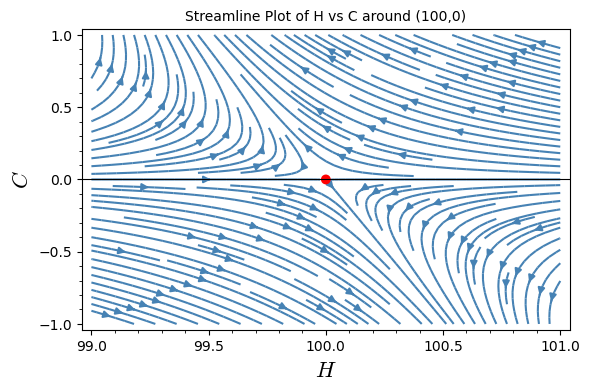

In [8]:
#zoom in around eq2
p = streamline_plot([dHdt,dCdt], (H,99,101) , (C,-1,1),
                       axes_labels=['$H$', '$C$'], density=1.5, title='Streamline Plot of H vs C around (100,0)',
                       color='steelblue',zorder=1)
p+=points(eq_points_computer[1], color='red', pointsize=50, zorder=2)
show(p)

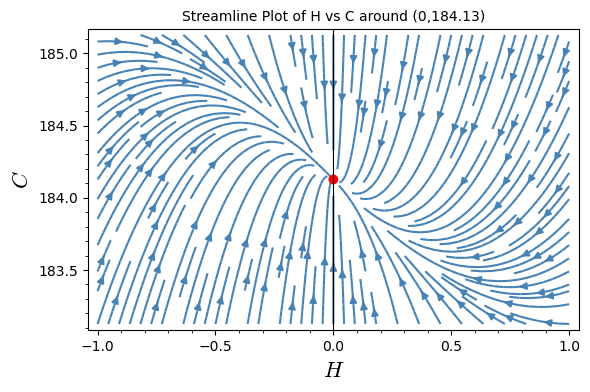

In [9]:
#zoom in around eq3
p = streamline_plot([dHdt,dCdt], (H,-1,1) , (C,11600/63-1, 11600/63+1),
                       axes_labels=['$H$', '$C$'], density=1.5, title='Streamline Plot of H vs C around (0,184.13)',
                       color='steelblue',zorder=1)
p+=points(eq_points_computer[2], color='red', pointsize=50, zorder=2)
show(p)

## now let's calculate the equilibrium types:

In [10]:
# we will represent our system like this: f = dHdt = (B_h/N)*(N-C-H)*H - (s_h+a_h)*H
# and                                     g = dCdt = (B_c/N)*(N-C-H)*C - (s_c+a_c)*C

f = function('f')(H,C)
g = function('g')(H,C)

f=(B_h/N)*(N-C-H)*H - (s_h+a_h)*H
g=(B_c/N)*(N-C-H)*C - (s_c+a_c)*C


### Find parital derivatives for Jacobian matrix
We calculated the Jacobian in order to linearize the system around its equilibria. 
We will define the Jacobian matrix below: 


In [11]:
#here we are representing partial derivatives, so d represents del 
dfdH = function('dfdH')(H,C)
dfdH = B_h-(B_h*C)/N - (2*B_h*H)/N - s_h - a_h

dfdC = function('dfdC')(H,C)
dfdC = -(H*B_h)/N

dgdH = function('dgdH')(H,C)
dgdH = -(C*B_c)/N

dgdC = function('dgdC')(H,C)
dgdC = B_c - (2*C*B_c)/N - (H*B_c)/N - s_c - a_c 

We now write a function to return the jacobian matrix evaluated around any point (h,c)

In [12]:
jacob_general = [[dfdH,dfdC],[dgdH,dgdC]]

def jacob_eval_at(h,c):
    return matrix(RDF, [[dfdH(H=h,C=c),dfdC(H=h,C=c)],[dgdH(H=h,C=c),dgdC(H=h,C=c)]] ) #RDF-real double field 

In [13]:
jacob_eval_at(0,0)

[                0.1                 0.0]
[                0.0 0.20714285714285716]

### Now let's find the eigenvectors of the Jacobian at the various EQ points to see what type of EQ we are working with

In [14]:
equilibria

[[H == 0, C == 0], [H == 100, C == 0], [H == 0, C == (11600/63)]]

### EQ 1

In [15]:
#around EQ1: (0,0)

jacob_eval_at(0,0).eigenvectors_right()

[(0.1, [(1.0, 0.0)], 1), (0.20714285714285716, [(0.0, 1.0)], 1)]

We get two real eigenvectors! (1,0) with eigenvalue=0.1 and (0,1) with eigenvalue 0.20714285714285716. This gives us a source and the solutions bend towards (0,1)

Let's try graphing the linear approximation around (0,0)

we have that X' ~~ J * Y

where Y = [(x-x0),(y-y0)]

this gives us the system: 

h' = 0.1h + 0c

c' = 0h + 0.207c 

In [16]:
jacob_eval_at(0,0)

[                0.1                 0.0]
[                0.0 0.20714285714285716]

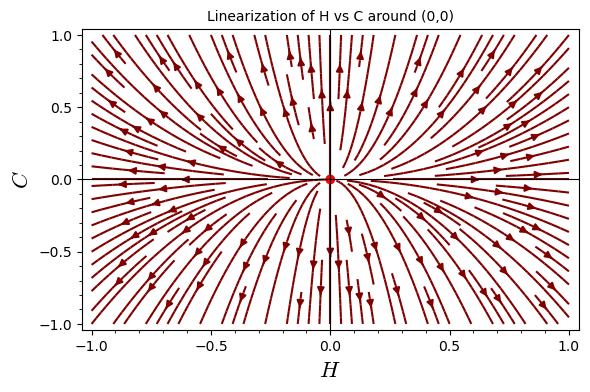

In [17]:
#linear approximation around (0,0)
J = jacob_eval_at(0,0)

#specify equilibrium to approximate around
H0=0
C0=0  


dH_approx = J[0][0]*(H-H0) + J[0 ][1]*(C-C0)  
dC_approx = J[1][0]*(H-H0) + J[1][1]*(C-C0) 

p = streamline_plot([dH_approx,dC_approx], (H,-1,1) , (C,-1,1),
                       axes_labels=['$H$','$C$'], density=1.5, title='Linearization of H vs C around (0,0)',
                       color='maroon',zorder=1)
p+=points(eq_points_computer[0], color='red', pointsize=50, zorder=2)
show(p)

### EQ2

In [18]:
# around  EQ2: (100,0)
jacob_eval_at(100,0).eigenvectors_right()

[(-0.1, [(1.0, 0.0)], 1),
 (0.09464285714285714, [(-0.45697920376639506, 0.8894773787595903)], 1)]

Again, we get 2 real eigenvectors, horray! (1,0) with eigenvalue: -0.1 and (-0.46, 0.89) with eigenvalue 0.095. One is positive and one is negative, so we are going to get a Saddle point around our EQ2

In [19]:
jacob_eval_at(100,0)

[               -0.1                -0.1]
[                0.0 0.09464285714285714]

In [20]:
J = jacob_eval_at(100,0)
J[1][1]

0.09464285714285714

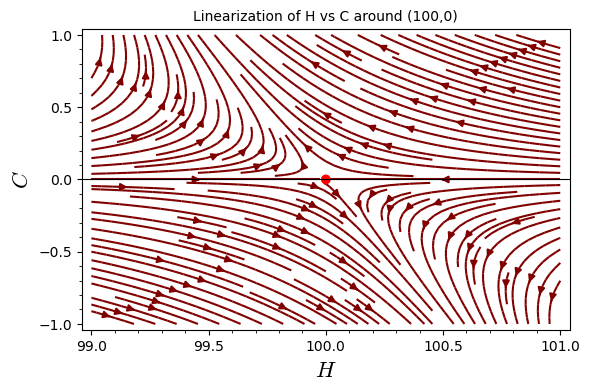

In [21]:
#linear approximation around (100,0)
J = jacob_eval_at(100,0)

#specify equilibrium to approximate around
H0=100
C0=0  


dH_approx = J[0][0]*(H-H0) + J[0 ][1]*(C-C0)  
dC_approx = J[1][0]*(H-H0) + J[1][1]*(C-C0) 

p = streamline_plot([dH_approx,dC_approx], (H,99,101) , (C,-1,1),
                       axes_labels=['$H$','$C$'], density=1.5, title='Linearization of H vs C around (100,0)',
                       color='maroon',zorder=1)
p+=points(eq_points_computer[1], color='red', pointsize=50, zorder=2)
show(p)

### EQ3

In [22]:
#around EQ3 (0,11600/63)
jacob_eval_at(0,11600/63).eigenvectors_right()

[(-0.20714285714285716, [(0.0, 1.0)], 1),
 (-0.08412698412698413, [(0.5106148657022418, -0.8598095480534522)], 1)]

In [19]:
jacob_eval_at(0,11600/63)

[-0.08412698412698413                  0.0]
[-0.20714285714285716 -0.20714285714285716]

Yet again, we get 2 real eigenvectors. (0,1) with eigenvalue: -0.21 and (0.51,-0.86) with eigenvalue: -0.084. This means that we will have a sink around EQ3 with the solutions bending/swirling more towards (0.51,-0.86) as they head in. This is becuase the other term exponentially decays faster. 

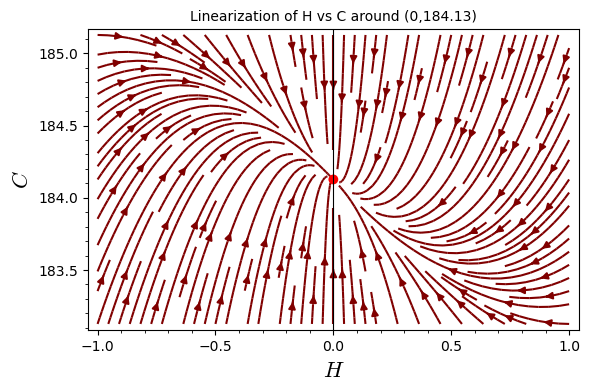

In [23]:
#linear approximation around (0,11600/63)

J = jacob_eval_at(0,11600/63)

#specify equilibrium to approximate around
H0=0
C0=11600/63 


dH_approx = J[0][0]*(H-H0) + J[0 ][1]*(C-C0)  
dC_approx = J[1][0]*(H-H0) + J[1][1]*(C-C0) 

p = streamline_plot([dH_approx,dC_approx], (H,-1,1) , (C,11600/63-1,11600/63+1),
                       axes_labels=['$H$','$C$'], density=1.5, title='Linearization of H vs C around (0,184.13)',
                       color='maroon',zorder=1)
p+=points(eq_points_computer[2], color='red', pointsize=50, zorder=2)
show(p)